
   * Age : age of the patient [years]
   * Sex : sex of the patient [M: Male, F: Female]
   * ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
   
   * RestingBP : resting blood pressure [mm Hg]
   * Cholesterol : serum cholesterol [mm/dl]
   * FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
   * RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
   * MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]
   * ExerciseAngina : exercise-induced angina [Y: Yes, N: No]
   * Oldpeak : oldpeak = ST [Numeric value measured in depression]
   * ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
   * HeartDisease : output class [1: heart disease, 0: Normal]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
data = pd.read_csv('heart.csv')
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

### Data Info :

In [5]:
data.shape

(918, 12)

In [6]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
data.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

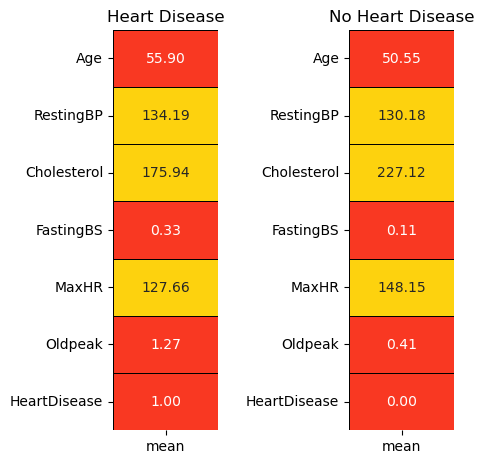

In [77]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

### Dividing features into Numerical and Categorical :

In [81]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


### Categorical Features :

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

In [85]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [83]:
df1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

#### Distribution of Categorical Features :

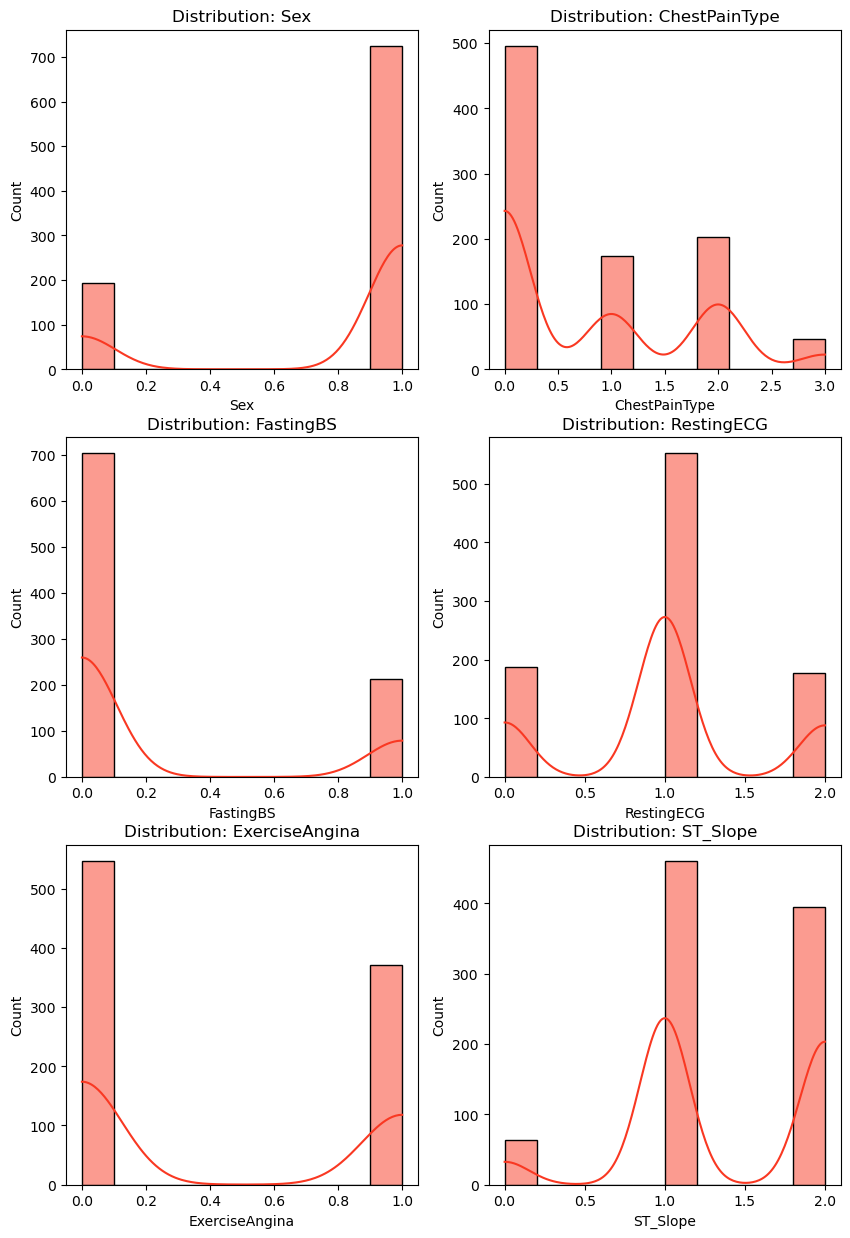

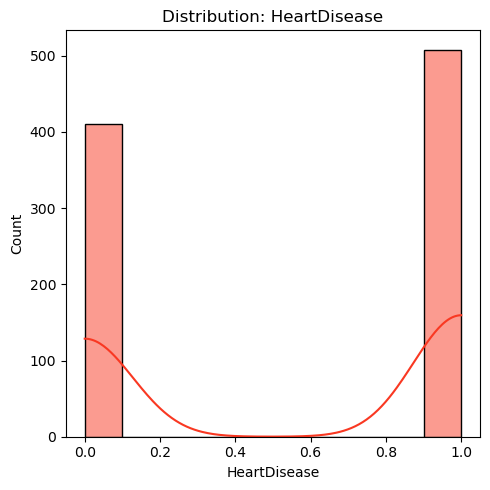

In [93]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))


for i in range(len(categorical_features) - 1):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df1[categorical_features[i]], color=colors[0], kde=True, bins=10)
    title = 'Distribution: ' + categorical_features[i]
    plt.title(title)


plt.figure(figsize=(5,5))
sns.histplot(df1[categorical_features[-1]], color=colors[0], kde=True, bins=10)
title = 'Distribution: ' + categorical_features[-1]
plt.title(title)

plt.tight_layout()
plt.show()


- All the categorical features are near about **Normally Distributed**.

### Numerical Features :

#### Distribution of Numerical Features :

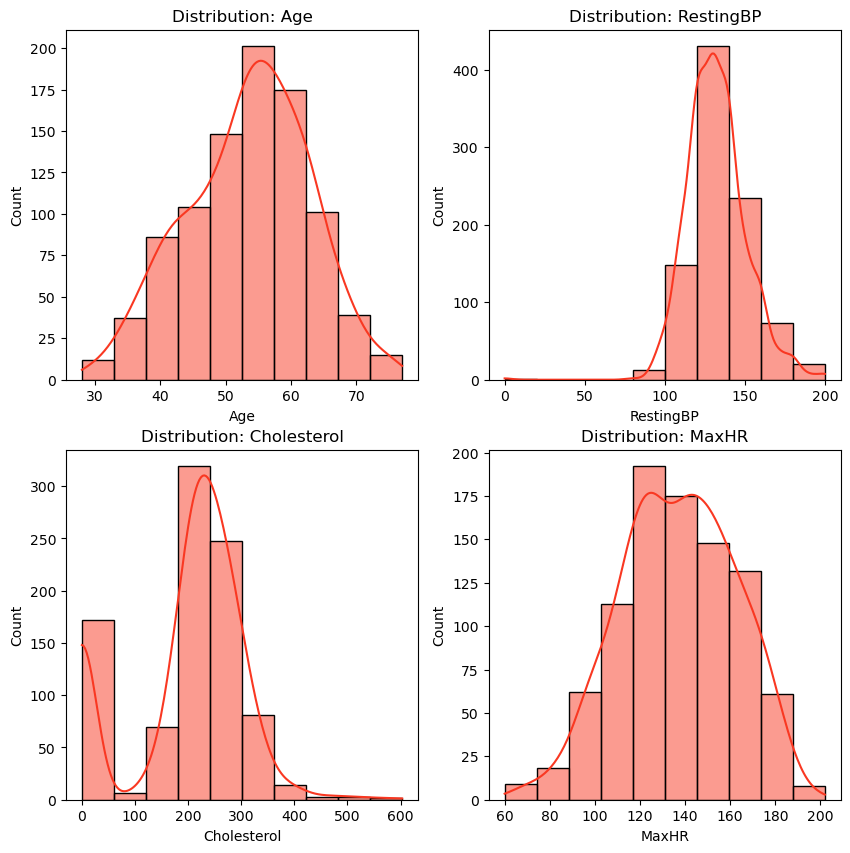

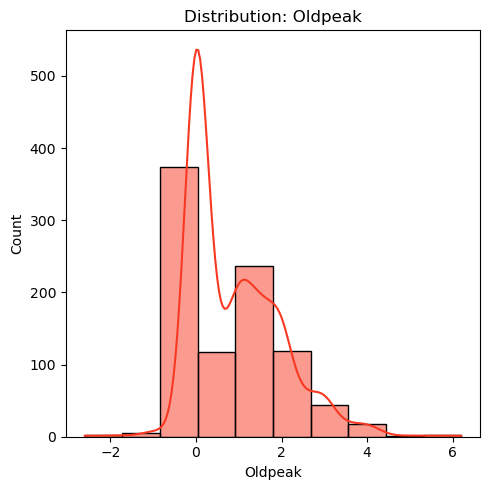

In [101]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))


for i in range(len(numerical_features) - 1):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[numerical_features[i]], color=colors[0], kde=True, bins=10)
    title = 'Distribution: ' + numerical_features[i]
    plt.title(title)

plt.figure(figsize=(5,5))
sns.histplot(df1[numerical_features[-1]], color=colors[0], kde=True, bins=10)
title = 'Distribution: ' + numerical_features[-1]
plt.title(title)

plt.tight_layout()
plt.show()


- **Oldpeak's** data distribution is rightly skewed.
- **Cholestrol** has a bidmodal data distribution. 

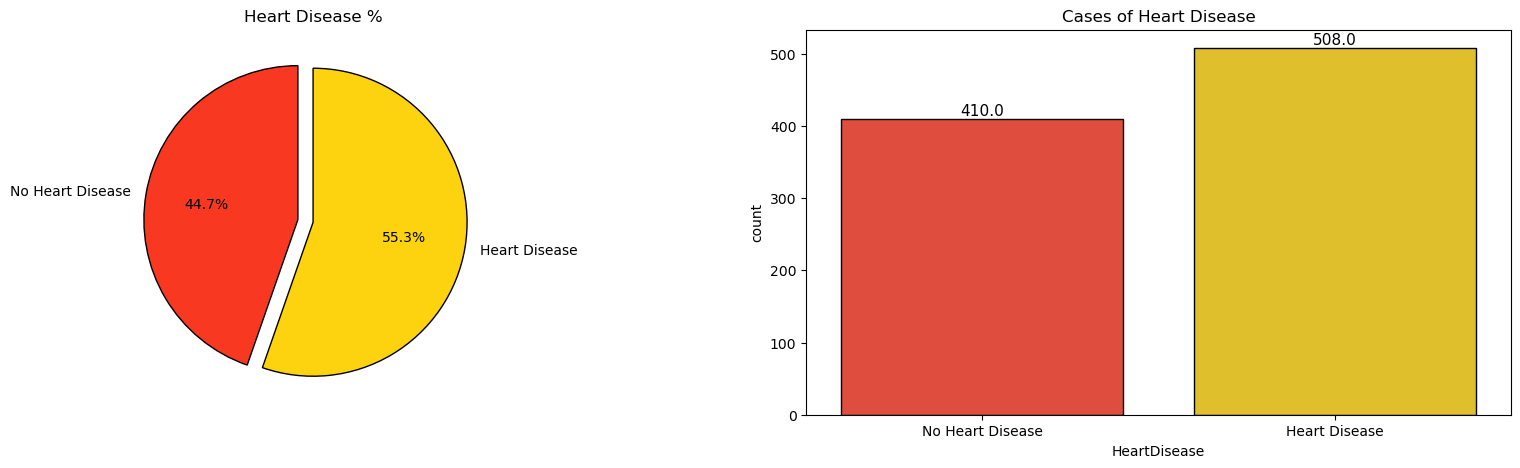

In [103]:
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')

plt.subplot(1, 2, 2)
ax = sns.countplot(x='HeartDisease', data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 5, rect.get_height(),
            horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease')

plt.show()


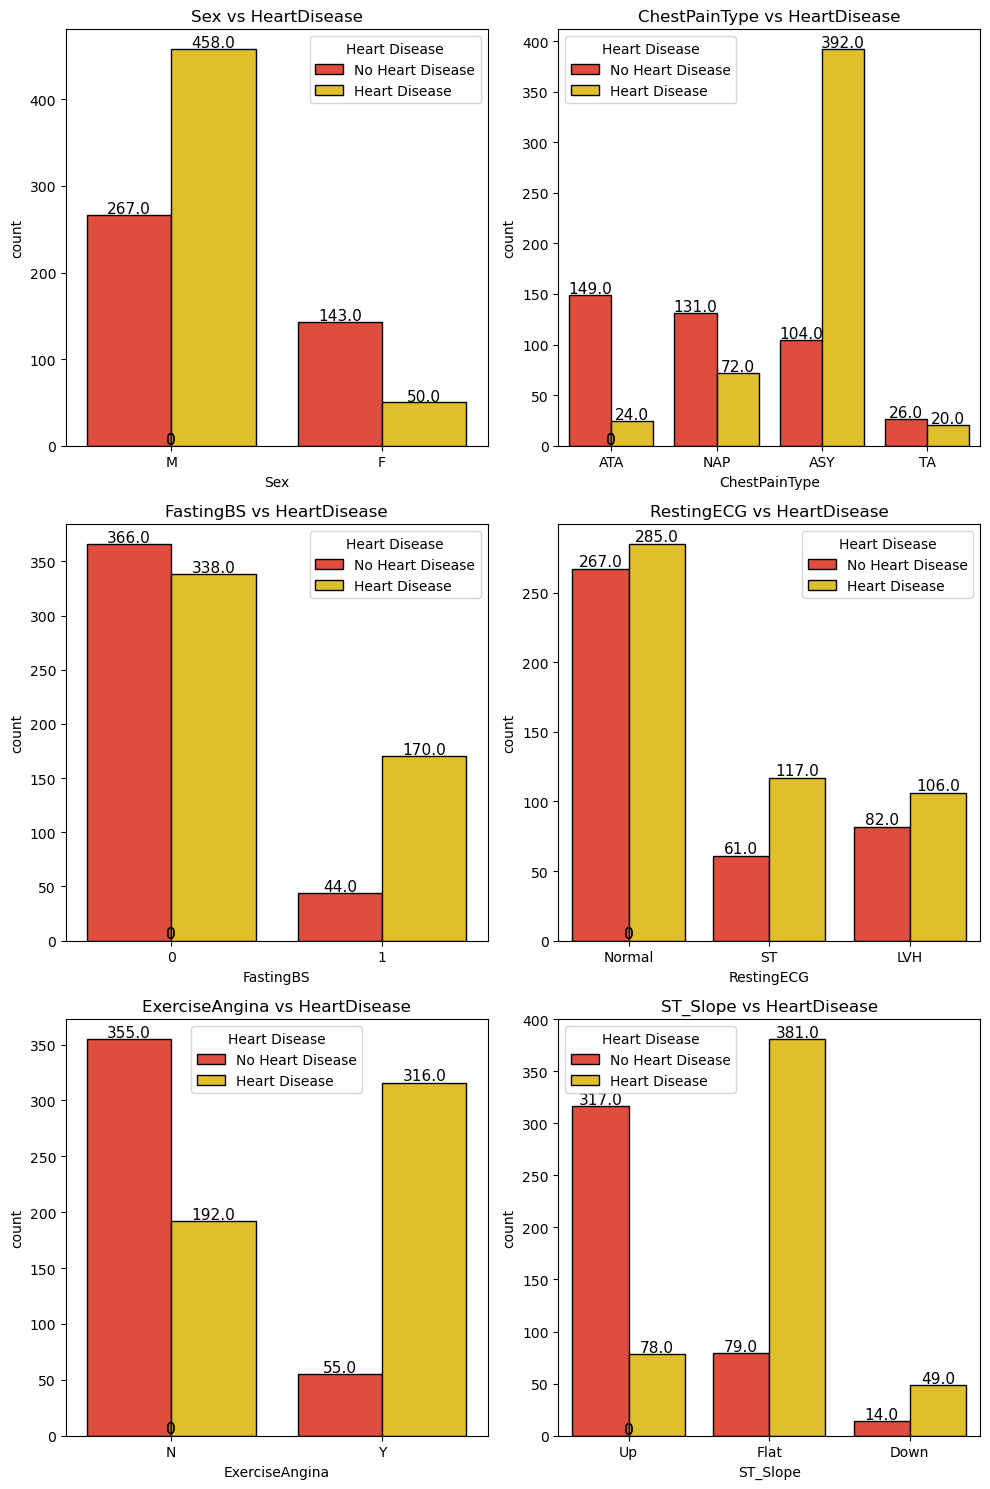

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

for i in range(len(categorical_features) - 1):
    plt.subplot(3, 2, i + 1)
    ax = sns.countplot(x=categorical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center', fontsize=11)
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease', 'Heart Disease'], title='Heart Disease')
    plt.title(title)

plt.tight_layout()
plt.show()

### Categorical Features vs Positive Heart Disease Cases :

In [63]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

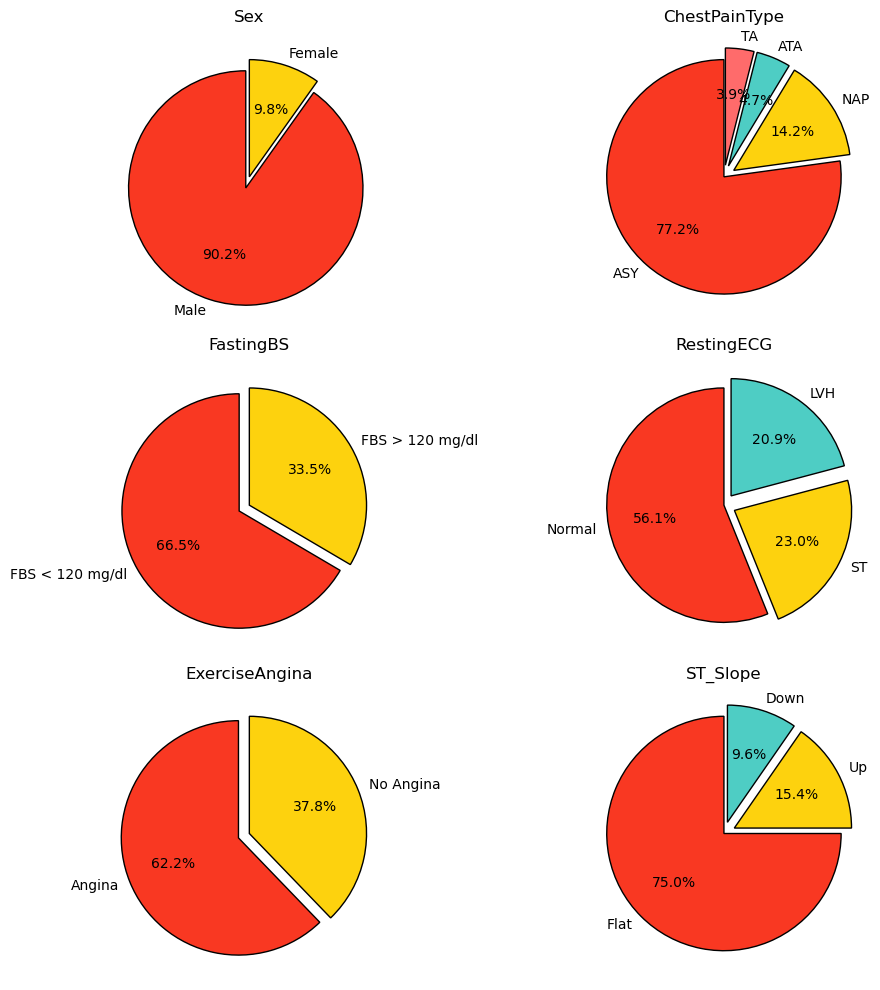

In [107]:
colors = ['#F93822', '#FDD20E', '#4ECDC4', '#FF6B6B', '#FFE156', '#6A4C93', '#D4A5A5', '#FF9F1C']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.pie(sex, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors[:2],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Sex')


plt.subplot(3, 2, 2)
plt.pie(cp, labels=['ASY', 'NAP', 'ATA', 'TA'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1, 0.1),
        colors=colors[:4], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ChestPainType')


plt.subplot(3, 2, 3)
plt.pie(fbs, labels=['FBS < 120 mg/dl', 'FBS > 120 mg/dl'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        colors=colors[:2], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('FastingBS')


plt.subplot(3, 2, 4)
plt.pie(restecg, labels=['Normal', 'ST', 'LVH'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
        colors=colors[:3], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('RestingECG')


plt.subplot(3, 2, 5)
plt.pie(exang, labels=['Angina', 'No Angina'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        colors=colors[:2], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ExerciseAngina')

plt.subplot(3, 2, 6)
plt.pie(slope, labels=['Flat', 'Up', 'Down'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
        colors=colors[:3], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ST_Slope')


plt.tight_layout()
plt.show()


- Out of all the heart disease patients, a staggering 90% patients are **male**.
- When it comes to the type of chest pain, **ASY** type holds the majority with 77% that lead to heart diseases.
- **Fasting Blood Sugar** level < 120 mg/dl displays high chances of heart diseases.
- For **RestingECG**, **Normal** level accounts for 56% chances of heart diseases than **LVH** and **ST** levels.
- Detection of **Exercise Induced Angina** also points towards heart diseases.
- When it comes to **ST_Slope** readings, **Flat** level holds a massive chunk with 75% that may assist in detecting underlying heart problems. 

### Numerical features vs Categorical features w.r.t Target variable(HeartDisease) :

#### Sex vs Numerical Features :

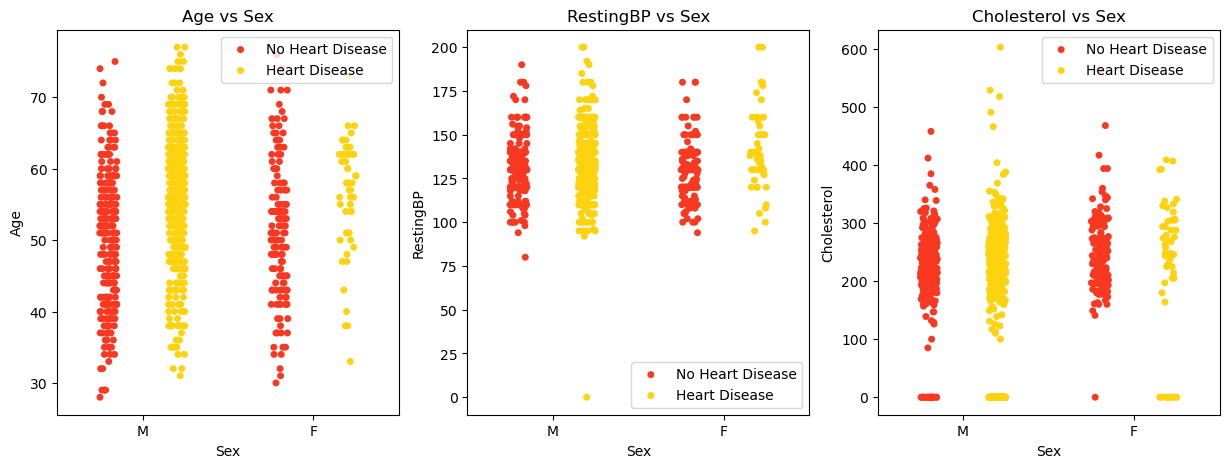

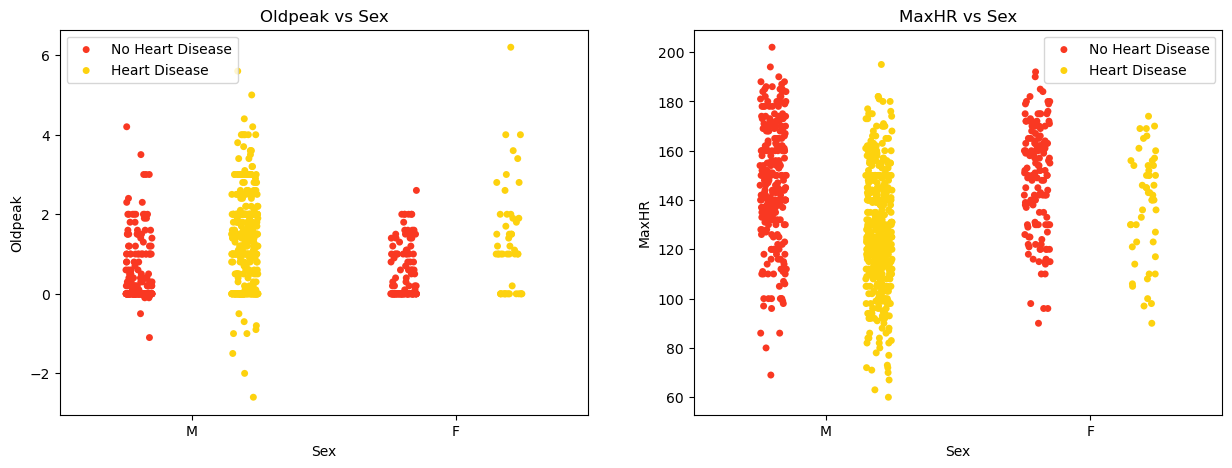

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.stripplot(x='Sex', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors, dodge=True)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in [-1, -2]:
    plt.subplot(1, 2, -i)
    sns.stripplot(x='Sex', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors, dodge=True)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)


#### ChestPainType vs Numerical Features :

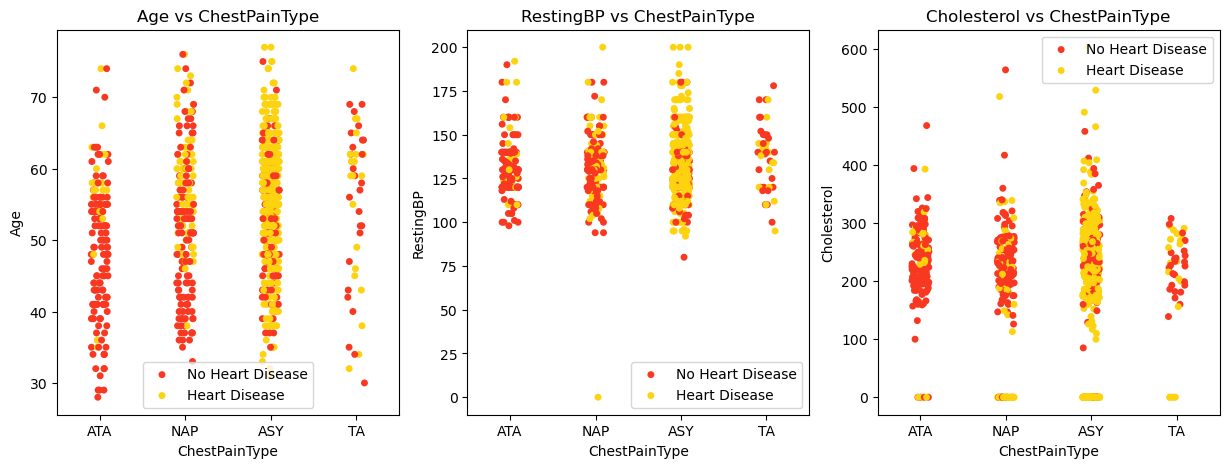

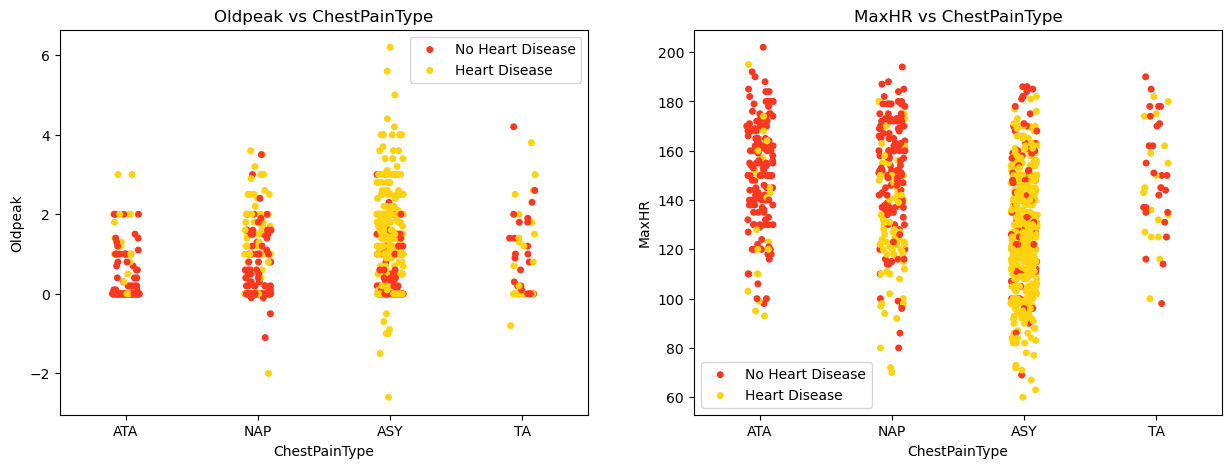

In [111]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType' 
    plt.title(title);

#### FastingBS vs Numerical features :

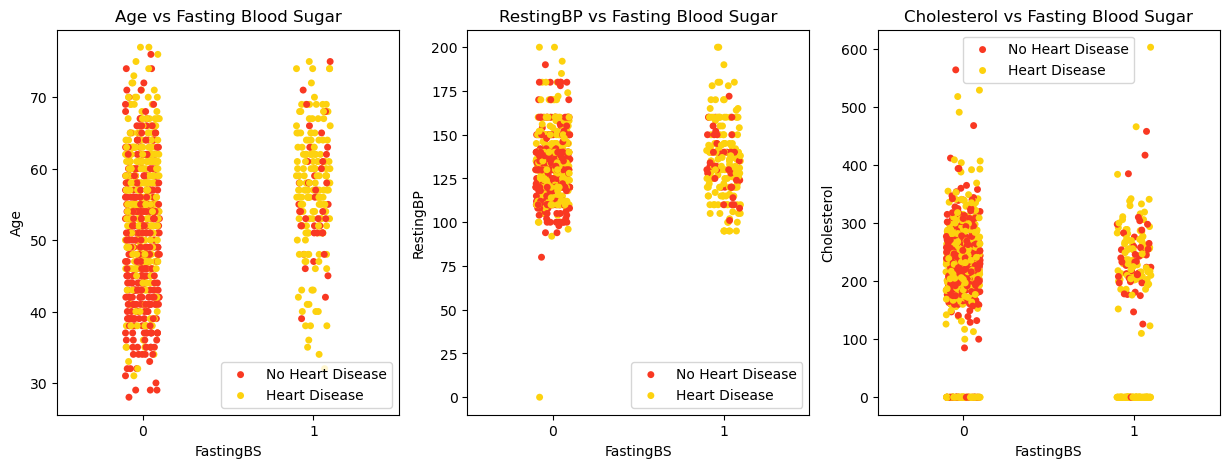

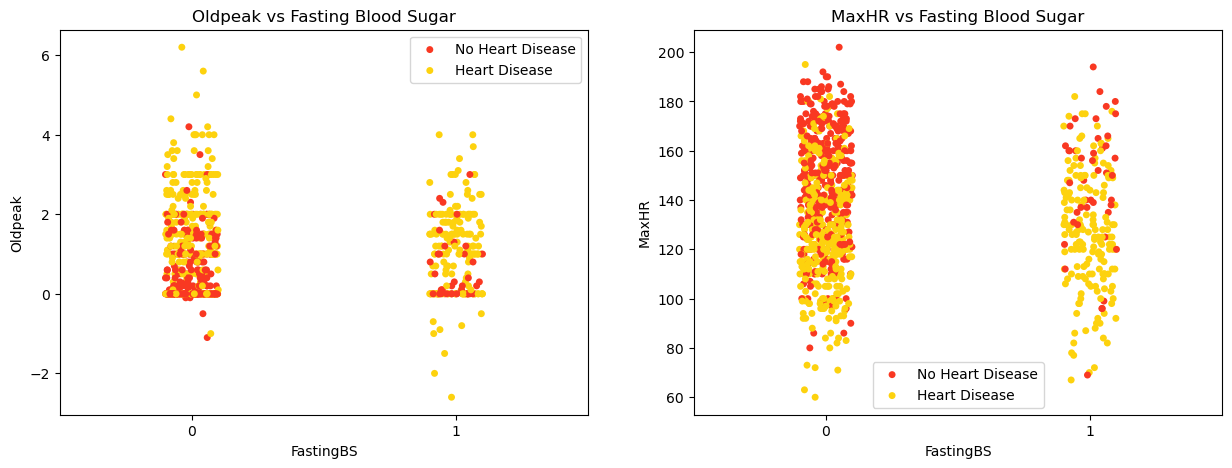

In [113]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

- Above the **age** 50, heart diseases are found throughout the data irrespective of the patient being diagnosed with Fasting Blood Sugar or not.
- **Fasting Blood Sugar** with **Resting BP** over 100 has displayed more cases of heart diseases than patients with no fasting blood sugar.
- **Cholesterol** with **Fasting Blood Sugar** does not seem to have an effect in understanding reason behind heart diseases.
- Patients that have not been found positive with **Fasting Blood Sugar** but have maximum heart rate below 130 are more prone to heart diseases.

#### ExerciseAngina vs Numerical Features :

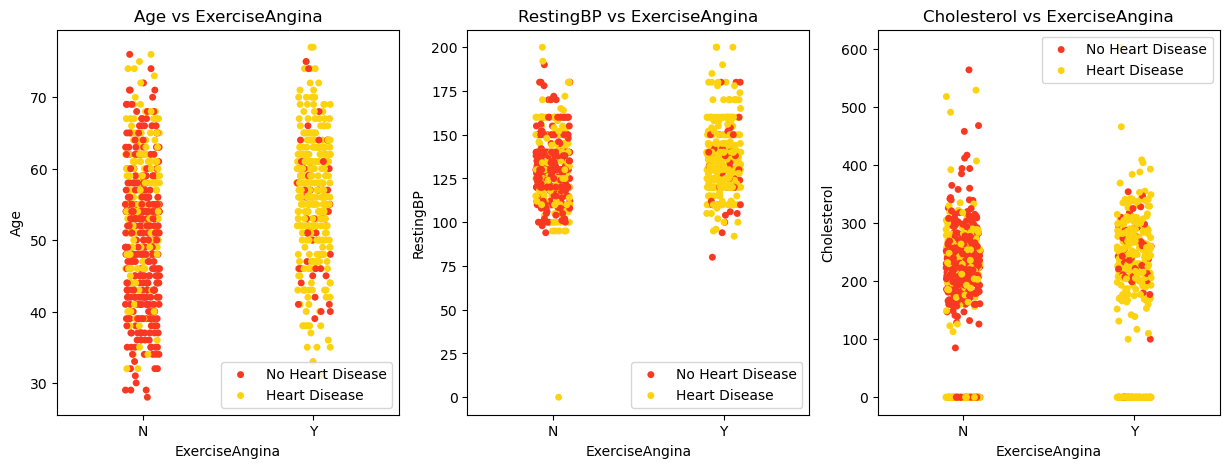

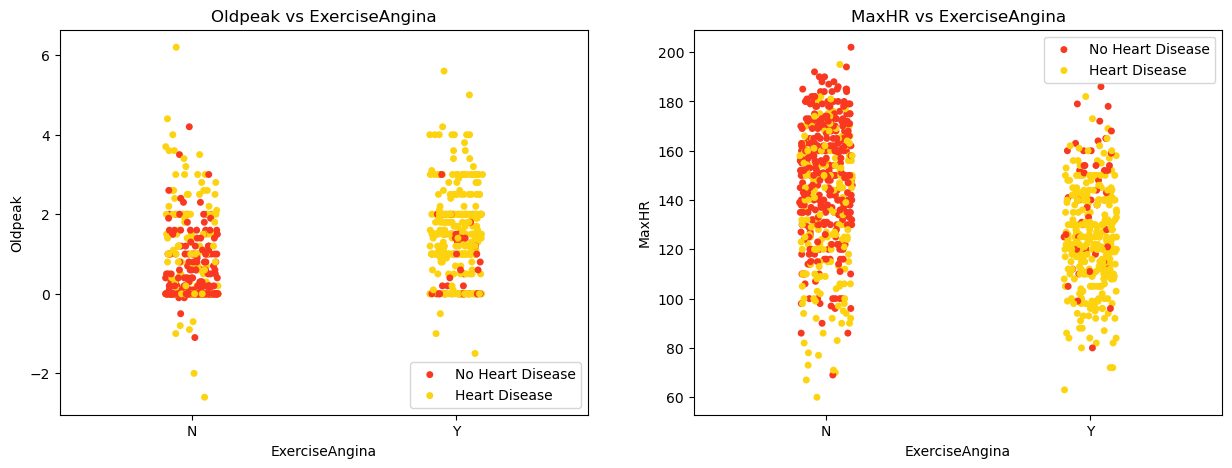

In [115]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina' 
    plt.title(title);

- A crsytal clear observation can be made about the relationship between **heart disease** case and **Exercise induced Angina**. A positive correlation between the 2 features can be concluded throughout all the numerical features. 

#### ST_Slope vs Numerical Features :

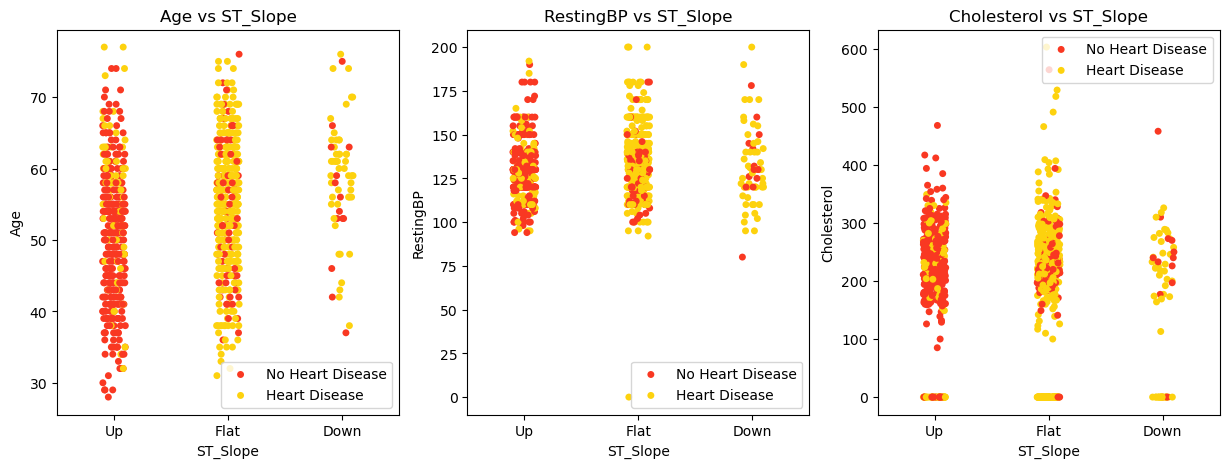

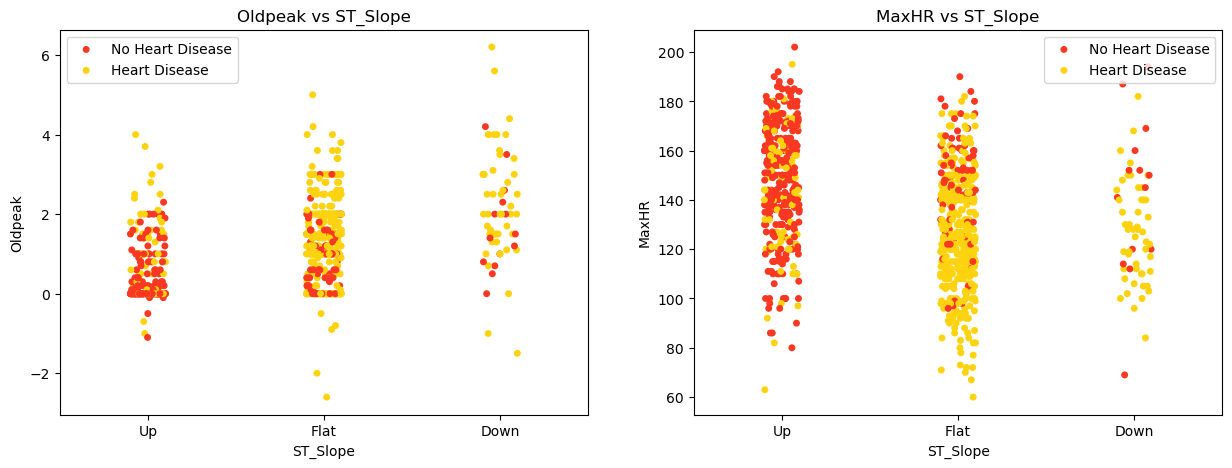

In [117]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

- Another crystal clear positive observation can be made about the positive correlation between **ST_Slope** value and **Heart Disease** cases. 
- **Flat**, **Down** and **Up** in that order display high, middle and low probability of being diagnosed with heart diseases respectively.

### Numerical features vs Numerical features w.r.t Target variable(HeartDisease) :

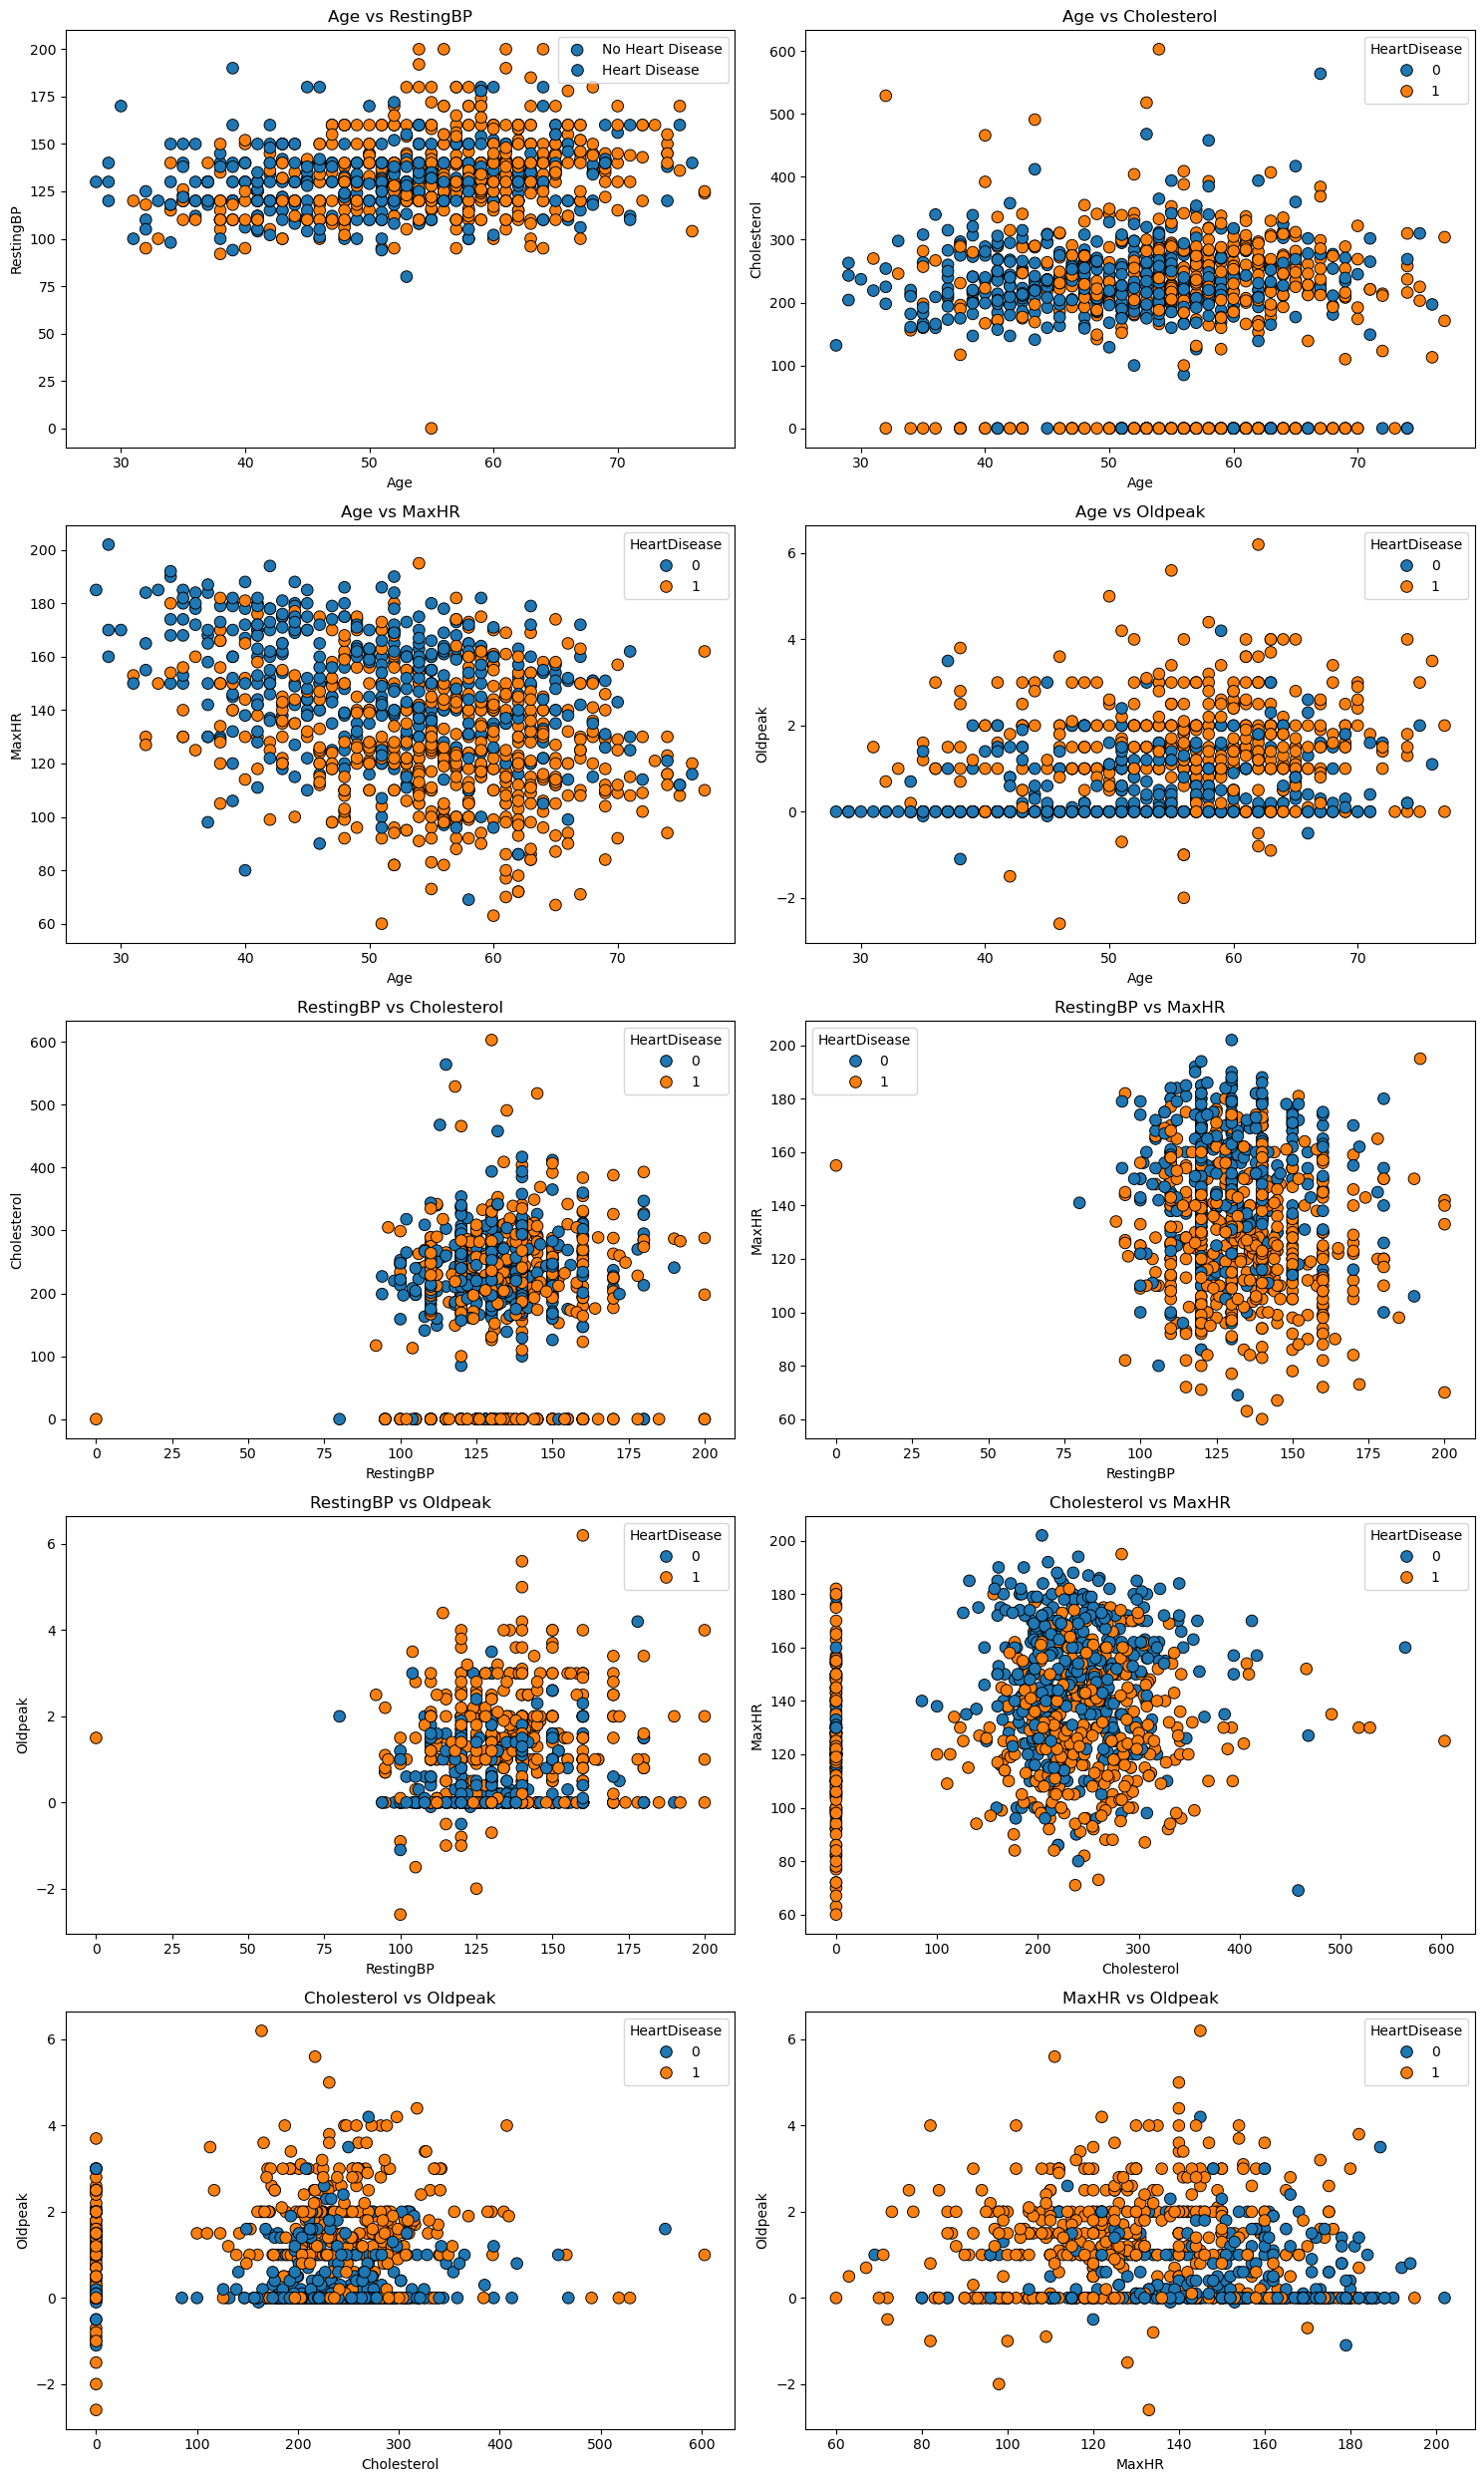

In [119]:
colors = ['#1f77b4', '#ff7f0e']  
a = 0
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)): 
        a += 1
        plt.subplot(5, 2, a)
        sns.scatterplot(x=numerical_features[i], y=numerical_features[j], data=data,
                        hue='HeartDisease', palette=colors, edgecolor='black', s=70)
        title = f"{numerical_features[i]} vs {numerical_features[j]}"
        plt.title(title)
        if a == 1:
            plt.legend(['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()



### Order / Values of features for positive cases of heart disease :

- **Categorical Features (Order) :**
    - Sex : Male > Female
    - ChestPainType : ASY > NAP > ATA > TA
    - FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
    - RestingECG : Normal > ST > LVH
    - ExerciseAngina : Angina > No Angina
    - ST_Slope : Flat > Up > Down
 
- **Numerical Features (Range) :**
    - Age : 50+
    - RestingBP : 95 - 170 
    - Cholesterol : 160 - 340
    - MaxHR : 70 - 180
    - Oldpeak : 0 - 4
    
    


### Correlation Matrix :

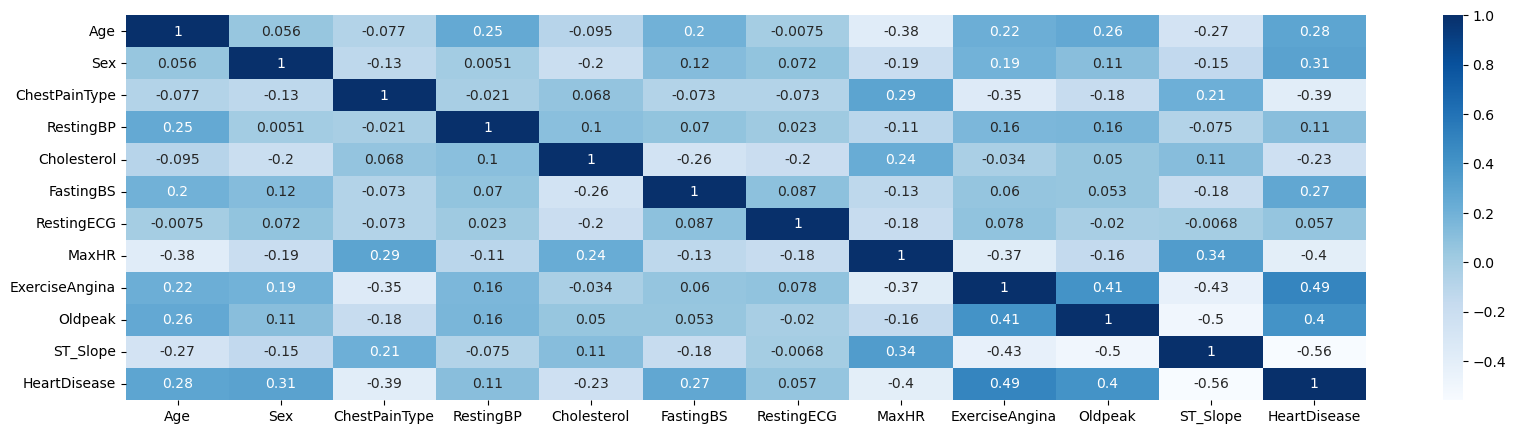

In [125]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap ='Blues',annot = True);

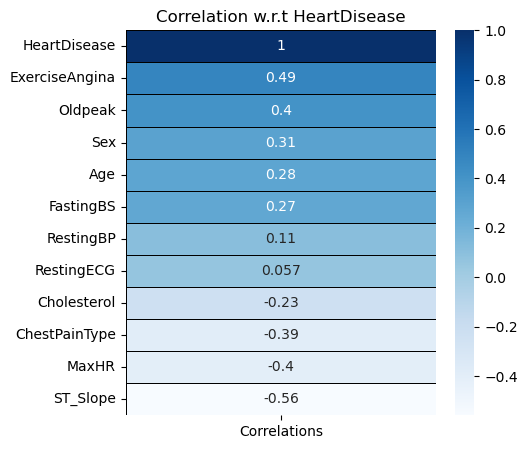

In [127]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'Blues',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

# Modeling

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [133]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [139]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Create and train the SVM model (SVC for classification)
svm = SVC(kernel='rbf')  # You can change the kernel type if needed (e.g., 'poly', 'rbf', 'sigmoid')
svm.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = svm.predict(X_test_scaled)

# Evaluate the model by calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM model: {accuracy * 100:.2f}%')


Accuracy of SVM model: 84.78%


In [141]:
from sklearn.linear_model import LogisticRegression
# Step 3: Apply scaling to the features (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Step 4: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
 

Accuracy: 0.8695652173913043


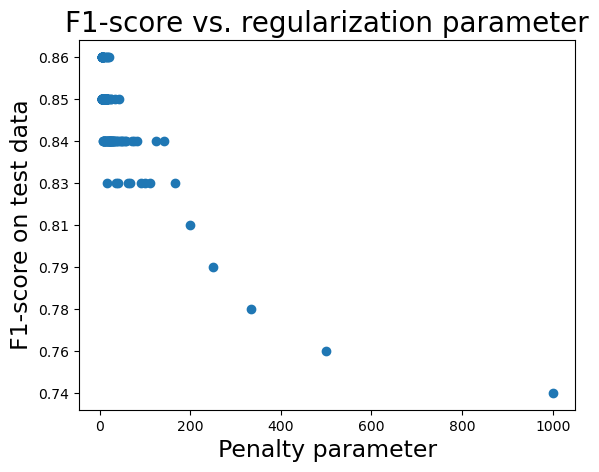

In [143]:
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu
for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(x_train,y_train)
        predictions[i] = logmodel[i].predict(x_test)
        class_report[i] = classification_report(y_test,predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

In [145]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [147]:
pred = knn.predict(x_test)

In [149]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[62 27]
 [23 72]]


In [151]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71        89
           1       0.73      0.76      0.74        95

    accuracy                           0.73       184
   macro avg       0.73      0.73      0.73       184
weighted avg       0.73      0.73      0.73       184



In [153]:
knn.score(x_train, y_train)

0.7574931880108992

In [155]:
model.score(x_test, y_test)

0.483695652173913

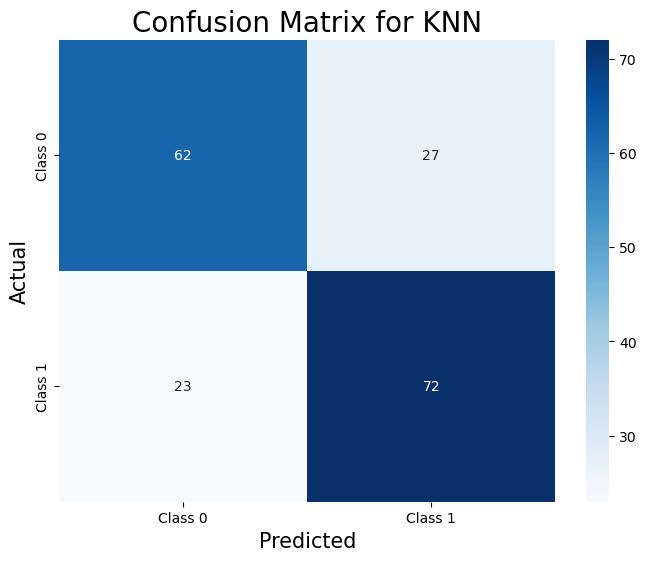

In [157]:
y_pred = knn.predict(x_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for KNN', fontsize=20)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.show()

In [159]:
error_rate = []

# Will take some time
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

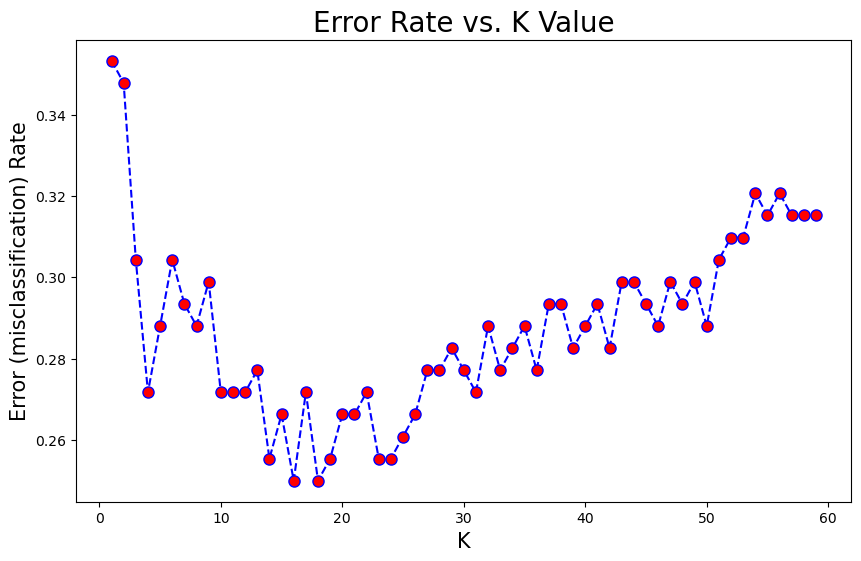

In [161]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)
plt.show()

# Descion tree

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [167]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [169]:
predictions = dtree.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        89
           1       0.83      0.85      0.84        95

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



In [171]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[72 17]
 [14 81]]
Accuracy of prediction: 0.832


# Random forest

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
rfc = RandomForestClassifier(n_estimators=600)


In [178]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=600)

In [179]:
r_pred = rfc.predict(x_test)

In [182]:
cr = classification_report(y_test,predictions)

In [184]:
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        89
           1       0.83      0.85      0.84        95

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



In [186]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='entropy')
    rfc.fit(x_train, y_train)
    rfc_pred = rfc.predict(x_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

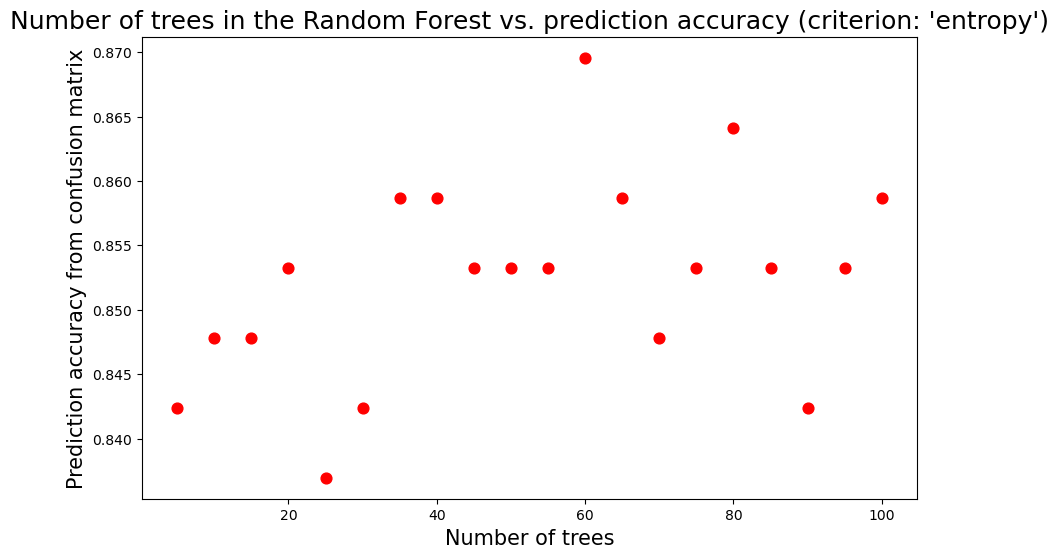

In [187]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)
plt.show()

In [188]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=5,max_depth=None,criterion='entropy')
    rfc.fit(x_train, y_train)
    rfc_pred = rfc.predict(x_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

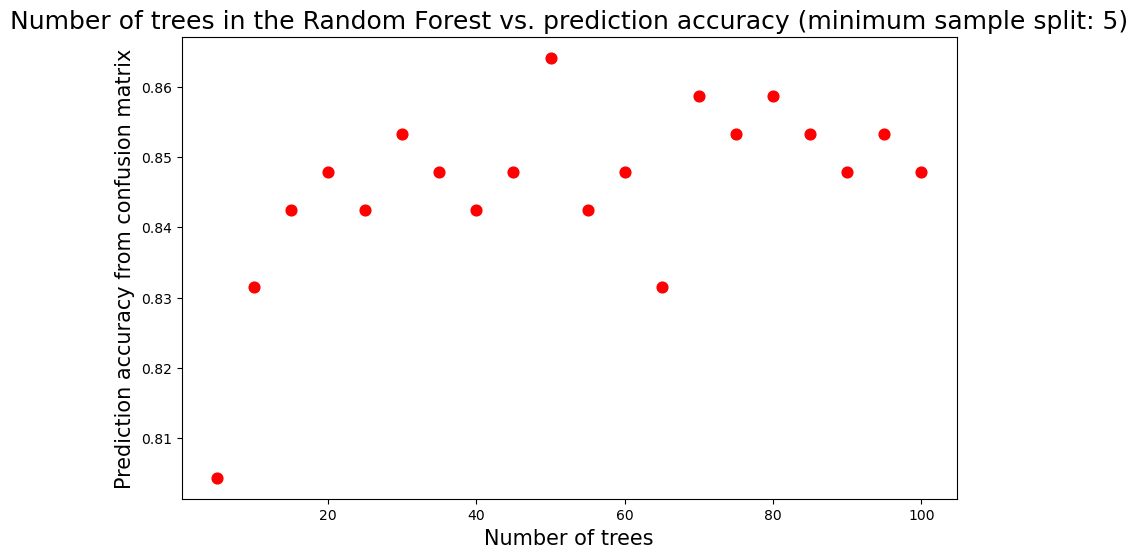

In [189]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 5)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)
plt.show()

In [190]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [196]:
df1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0